In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data Clean.csv')
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,not subscribed,not used,6,2021
1,504309,18,Female,36.2,3,2021-10-12,2.896,Paypal,656,Chrome,not subscribed,used,10,2021
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,subscribed,not used,3,2021
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,subscribed,not used,10,2021
4,504313,55,Male,13.7,6,2021-05-14,12.467,Card,364,Safari,not subscribed,not used,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65194,570099,30,Female,10.9,4,2021-02-15,6.213,Card,894,Chrome,not subscribed,not used,2,2021
65195,570100,33,Male,29.3,1,2021-05-02,29.300,Digital Wallets,722,Chrome,not subscribed,not used,5,2021
65196,570101,50,Male,25.4,5,2021-10-29,23.114,Others,424,Chrome,not subscribed,not used,10,2021
65197,570102,56,Male,29.2,1,2021-09-12,29.200,Others,731,Chrome,not subscribed,not used,9,2021


# Q1: Which month has highest revenue, any relevant to time people spend on web?

In [3]:
Revenue = df.groupby('Month').sum()['Revenue_Total']

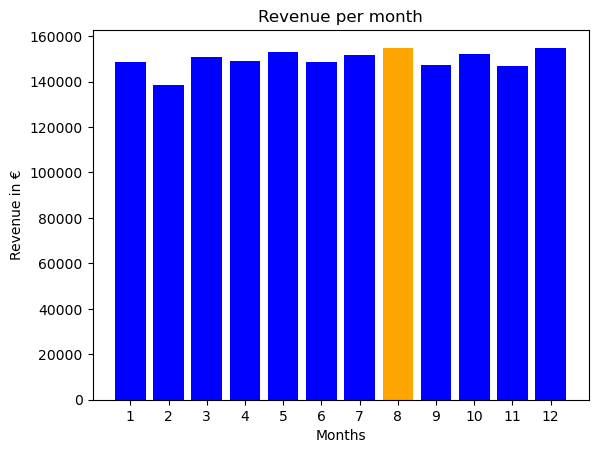

In [4]:
months = range(1,13)

figure, axis = plt.subplots()

colors = ['orange' if (bar == Revenue.max()) else 'blue' for bar in Revenue]

plt.bar(x=months, height = Revenue, color=colors)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Revenue in €')
plt.title('Revenue per month')

plt.show()

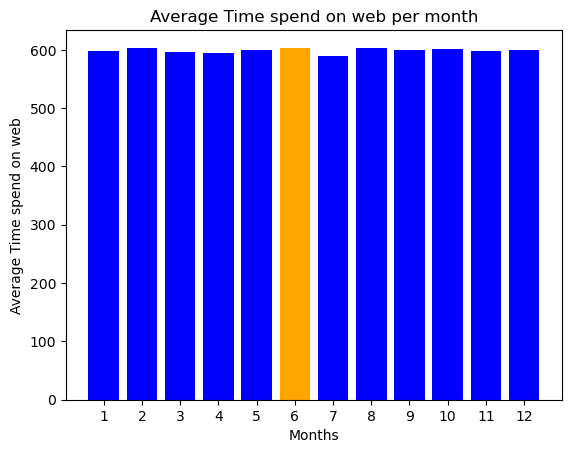

In [5]:
Time = df.groupby('Month').mean()['Time_Spent']

figure, axis = plt.subplots()

colors = ['orange' if (bar == Time.max()) else 'blue' for bar in Time]

plt.bar(x=months, height = Time, color=colors)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Average Time spend on web')
plt.title('Average Time spend on web per month')

plt.show()

conclusion: Athough August has highest revenue, it's not significantly different versus other month. February is slightly lower than others might because it has lowest days. Also, no significant different between monthly sale vs time people spend on web and among months.

# Q2: are youngers people spend time on web lower than olders

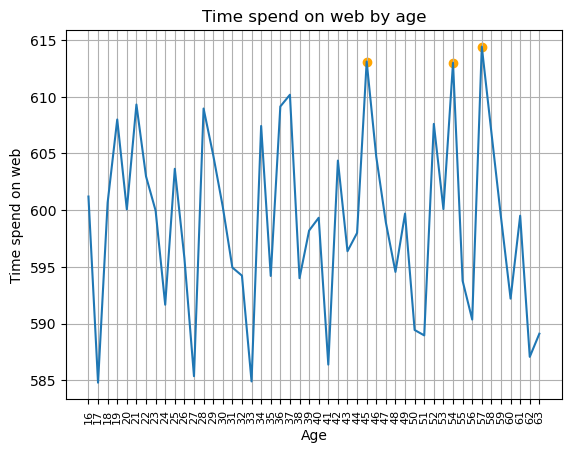

In [6]:
Time_Age = df.groupby('Age').mean()['Time_Spent']

highest = Time_Age.nlargest(3)
ages = []
hour = []
highest_age = []
for a, b in Time_Age.items():
    ages.append(a)
for a, b in highest.items():
    highest_age.append(a)
    hour.append(b)

plt.plot(ages, Time_Age)
plt.xticks(ages, rotation = 90, size =8)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Time spend on web')
plt.title('Time spend on web by age')

plt.scatter(highest_age, hour, color = 'orange')

plt.show()

# Warning: misleading graph
Above graph can cause misleading. we see that age groups above 40 has highest times on web. This is strange because normally, youngers seem to spend much more time on web than the older.
We can see that this graph axis not started from 0, the range is petty small (585-615).
In this case, we should draw chart with y axis from 0 as below chart:

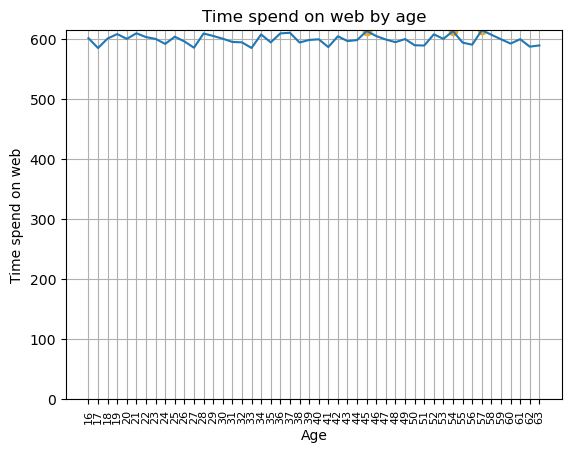

In [7]:
figure, axis = plt.subplots()
axis.set_ylim(0,615)
plt.plot(ages, Time_Age)
plt.xticks(ages, rotation = 90, size =8)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Time spend on web')
plt.title('Time spend on web by age')

plt.scatter(highest_age, hour, color = 'orange')

plt.show()

So we have the answer that there is time spend on web based on customers age are likely not significantly different and around 600s (10 minutes)

# Q3: Which Browser is the most favorite for customer

([<matplotlib.patches.Wedge at 0x22284f39580>,
 [Text(-1.1738012141111815, -0.558740288283489, 'Chrome'),
  Text(0.9532179406185157, -0.5489768280018711, 'Edge'),
  Text(1.099811678004054, -0.020353695632655593, 'Others'),
  Text(0.641378660131871, 0.89366291985706, 'Safari')],
 [Text(-0.7223392086838041, -0.34384017740522393, '64.1%'),
  Text(0.5199370585191904, -0.2994419061828388, '5.1%'),
  Text(0.5998972789113022, -0.011102015799630322, '11.0%'),
  Text(0.34984290552647507, 0.4874525017402145, '19.8%')])

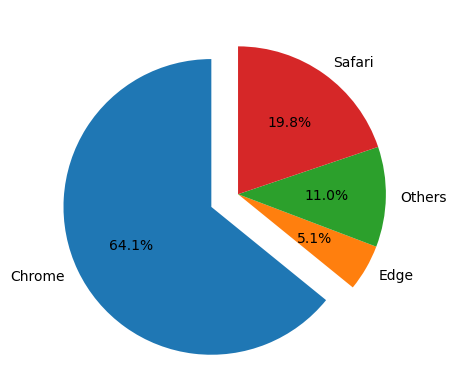

In [25]:
Browser_Revenue = df.groupby('Browser').sum()['Revenue_Total'].to_frame()
myexplode = [0.2, 0, 0, 0]
plt.pie(Browser_Revenue['Revenue_Total'], labels = Browser_Revenue.index, explode = myexplode,autopct = '%1.1f%%', startangle = 90)


([<matplotlib.patches.Wedge at 0x222850bd7f0>,
 [Text(-1.177136833525616, -0.5516782351672813, 'Chrome'),
  Text(1.09749629357062, -0.0741746964857392, 'Safari'),
  Text(0.6808457961287744, 0.8639728015937629, 'Others'),
  Text(0.1770521658831304, 1.0856576488728353, 'Edge')],
 [Text(-0.7243918975542253, -0.3394942985644808, '64.0%'),
  Text(0.5986343419476109, -0.04045892535585774, '20.0%'),
  Text(0.3713704342520587, 0.47125789177841604, '11.0%'),
  Text(0.09657390866352566, 0.5921768993851829, '5.1%')])

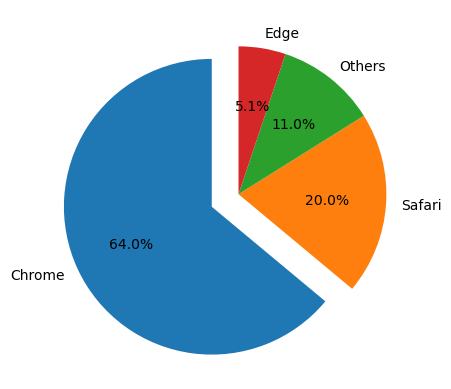

In [28]:
Browser_count = df['Browser'].value_counts().to_frame()
plt.pie(Browser_count['Browser'], labels = Browser_count.index, explode = myexplode,autopct = '%1.1f%%', startangle = 90)


We can see that 64% customer use Chrome, follow are Safari, Others, and Edge. Same proportion with revenue.
From Web time and Browser counting, we can make conclusion that customer spend around 10 minutes on searching and buying product (not much). Customer not spend much time viewing other products.
To attract more customer (mean they can spend more time looking for products on web), need to push up ads, proposals and the first candidate to launch ads is Chrome